<a href="https://colab.research.google.com/github/muyuuuu/open-mmlab-colab/blob/main/Data/mixup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 检查 torch 版本

In [1]:
import torch
torch.__version__

'1.8.1+cu101'


# 安装 MMdetection

In [2]:
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu101/torch1.8.0/index.html
     |████████████████████████████████| 31.2MB 99kB/s 
     |████████████████████████████████| 194kB 22.9MB/s 


In [3]:
!git clone https://github.com/muyuuuu/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 18084, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 18084 (delta 76), reused 93 (delta 35), pack-reused 17905
Receiving objects: 100% (18084/18084), 21.44 MiB | 29.20 MiB/s, done.
Resolving deltas: 100% (12563/12563), done.


In [4]:
%cd mmdetection
!pip install -r requirements/build.txt
!pip install -v -e .

/content/mmdetection
Created temporary directory: /tmp/pip-ephem-wheel-cache-07lkkk36
Created temporary directory: /tmp/pip-req-tracker-50ecpyev
Created requirements tracker '/tmp/pip-req-tracker-50ecpyev'
Created temporary directory: /tmp/pip-install-rtsg3vcn
Obtaining file:///content/mmdetection
  Added file:///content/mmdetection to build tracker '/tmp/pip-req-tracker-50ecpyev'
    Running setup.py (path:/content/mmdetection/setup.py) egg_info for package from file:///content/mmdetection
    Running command python setup.py egg_info
    running egg_info
    creating mmdet.egg-info
    writing mmdet.egg-info/PKG-INFO
    writing dependency_links to mmdet.egg-info/dependency_links.txt
    writing requirements to mmdet.egg-info/requires.txt
    writing top-level names to mmdet.egg-info/top_level.txt
    writing manifest file 'mmdet.egg-info/SOURCES.txt'
    adding license file 'LICENSE' (matched pattern 'LICEN[CS]E*')
    reading manifest template 'MANIFEST.in'
    writing manifest file

# 验证

In [5]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

# 简单推理

--2021-06-02 11:54:04--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_2x_coco/faster_rcnn_r50_fpn_2x_coco_bbox_mAP-0.384_20200504_210434-a5d8aa15.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167290877 (160M) [application/octet-stream]
Saving to: ‘checkpoints/model.pth’

checkpoints/model.p 100%[===================>] 159.54M  8.70MB/s    in 20s     

2021-06-02 11:54:25 (7.97 MB/s) - ‘checkpoints/model.pth’ saved [167290877/167290877]

Use load_from_local loader


/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


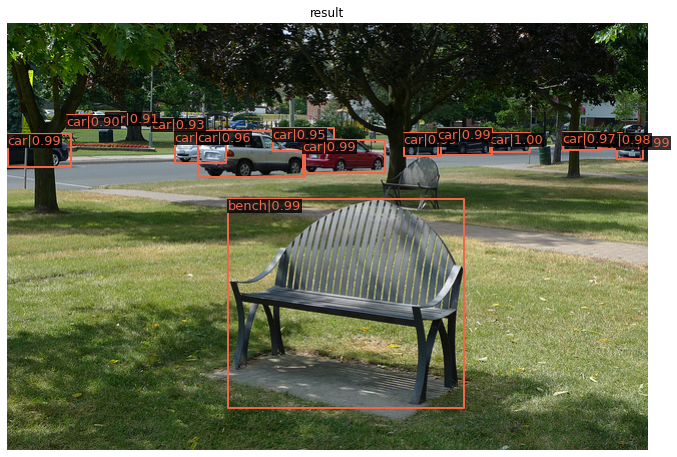

In [6]:
from PIL import Image
Image.open('demo/demo.jpg')

!mkdir checkpoints
!wget http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_2x_coco/faster_rcnn_r50_fpn_2x_coco_bbox_mAP-0.384_20200504_210434-a5d8aa15.pth -O checkpoints/model.pth

# 目标检测配置文件
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_2x_coco.py'
# 训练模型
checkpoint_file = 'checkpoints/model.pth'

# 配置模型
model = init_detector(config=config_file,
                      checkpoint=checkpoint_file,
                      device='cuda:0')

img = 'demo/demo.jpg'
#  推理实际调用语句
result = inference_detector(model=model, imgs=img)

# 展示置信度大于 0.9 的结果
show_result_pyplot(model=model,
                  img=img,
                  result=result,
                  score_thr=0.9)

# MiniCoco

In [8]:
!git clone https://github.com/chongruo/tiny-coco.git

Cloning into 'tiny-coco'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 29 (delta 0), reused 29 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [10]:
!mkdir data
!mv tiny-coco/small_coco/* data/

In [22]:
!python tools/train.py configs/faster_rcnn/mynet.py --no-validate

/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py:250: UserWarning: The old API of register_module(module, force=False) is deprecated and will be removed, please use the new API register_module(name=None, force=False, module=None) instead.
  'The old API of register_module(module, force=False) '
2021-06-02 12:27:44,478 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.8.1+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v1.7.0 (Git Hash 7aed236906b1f7a05c0917e5257a1af05e9ff683)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)


# 代码配置文件

```python
_base_ = [
    '../_base_/models/faster_rcnn_r50_fpn.py',
    '../_base_/datasets/coco_detection.py',
    '../_base_/schedules/schedule_2x.py', '../_base_/default_runtime.py'
]

# model settings
model = dict(
    type='FasterRCNN',
    pretrained='torchvision://resnet50',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch'),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[.0, .0, .0, .0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(type='L1Loss', loss_weight=1.0)),
    roi_head=dict(
        type='StandardRoIHead',
        bbox_roi_extractor=dict(
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=7, sampling_ratio=0),
            out_channels=256,
            featmap_strides=[4, 8, 16, 32]),
        bbox_head=dict(
            type='Shared2FCBBoxHead',
            in_channels=256,
            fc_out_channels=1024,
            roi_feat_size=7,
            num_classes=80,
            bbox_coder=dict(
                type='DeltaXYWHBBoxCoder',
                target_means=[0., 0., 0., 0.],
                target_stds=[0.1, 0.1, 0.2, 0.2]),
            reg_class_agnostic=False,
            loss_cls=dict(
                type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0),
            loss_bbox=dict(type='L1Loss', loss_weight=1.0))),
    # model training and testing settings
    train_cfg=dict(
        rpn=dict(
            assigner=dict(
                type='MaxIoUAssigner',
                pos_iou_thr=0.7,
                neg_iou_thr=0.3,
                min_pos_iou=0.3,
                match_low_quality=True,
                ignore_iof_thr=-1),
            sampler=dict(
                type='RandomSampler',
                num=256,
                pos_fraction=0.5,
                neg_pos_ub=-1,
                add_gt_as_proposals=False),
            allowed_border=-1,
            pos_weight=-1,
            debug=False),
        rpn_proposal=dict(
            nms_pre=2000,
            max_per_img=1000,
            nms=dict(type='nms', iou_threshold=0.7),
            min_bbox_size=0),
        rcnn=dict(
            assigner=dict(
                type='MaxIoUAssigner',
                pos_iou_thr=0.5,
                neg_iou_thr=0.5,
                min_pos_iou=0.5,
                match_low_quality=False,
                ignore_iof_thr=-1),
            sampler=dict(
                type='RandomSampler',
                num=512,
                pos_fraction=0.25,
                neg_pos_ub=-1,
                add_gt_as_proposals=True),
            pos_weight=-1,
            debug=False)),
    test_cfg=dict(
        rpn=dict(
            nms_pre=1000,
            max_per_img=1000,
            nms=dict(type='nms', iou_threshold=0.7),
            min_bbox_size=0),
        rcnn=dict(
            score_thr=0.05,
            nms=dict(type='nms', iou_threshold=0.5),
            max_per_img=100)
        # soft-nms is also supported for rcnn testing
        # e.g., nms=dict(type='soft_nms', iou_threshold=0.5, min_score=0.05)
    ))

# dataset settings
dataset_type = 'CocoDataset'
data_root = 'data/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='MixUp', p=0.5, lambd=0.5)
    dict(type='Resize', img_scale=(1333, 800), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels']),
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1333, 800),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **img_norm_cfg),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]
data = dict(
    samples_per_gpu=2,
    workers_per_gpu=2,
    train=dict(
        type=dataset_type,
        ann_file=data_root + 'instances_train2017_small.json',
        img_prefix=data_root + 'train_2017_small/',
        pipeline=train_pipeline),
    val=dict(
        type=dataset_type,
        ann_file=data_root + 'annotations/instances_val2017.json',
        img_prefix=data_root + 'val2017/',
        pipeline=test_pipeline),
    test=dict(
        type=dataset_type,
        ann_file=data_root + 'annotations/instances_val2017.json',
        img_prefix=data_root + 'val2017/',
        pipeline=test_pipeline))
evaluation = dict(interval=1, metric='bbox')
```